In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
data = pd.read_csv('Housing.csv')
print(data.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
data = data.dropna()  # Simple approach: drop missing values


In [ ]:
data = pd.get_dummies(data, columns=['mainroad'], drop_first=True)


In [ ]:
data = pd.read_csv('Housing.csv')
print(data.head())



      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
# Encode categorical variables
label_enc = LabelEncoder()
if 'Location' in data.columns:  # Example column
    data['Location'] = label_enc.fit_transform(data['Location'])

# Feature scaling for numerical columns
scaler = StandardScaler()
num_cols = ['Size', 'Bedrooms', 'Bathrooms']  # Replace with actual numerical columns
data[num_cols] = scaler.fit_transform(data[num_cols])

# Check the processed data
print(data.head())


NameError: name 'LabelEncoder' is not defined

In [ ]:
# Encode categorical variables
label_enc = LabelEncoder()
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    data[col] = label_enc.fit_transform(data[col])

NameError: name 'LabelEncoder' is not defined

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Encode categorical variables
label_enc = LabelEncoder()
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    data[col] = label_enc.fit_transform(data[col])


In [ ]:
# Feature-target separation
X = data.drop('price', axis=1)
y = data['price']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


NameError: name 'r2_score' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score



Model Performance:
Mean Squared Error: 1771751116594.0352
R-squared: 0.6494754192267803


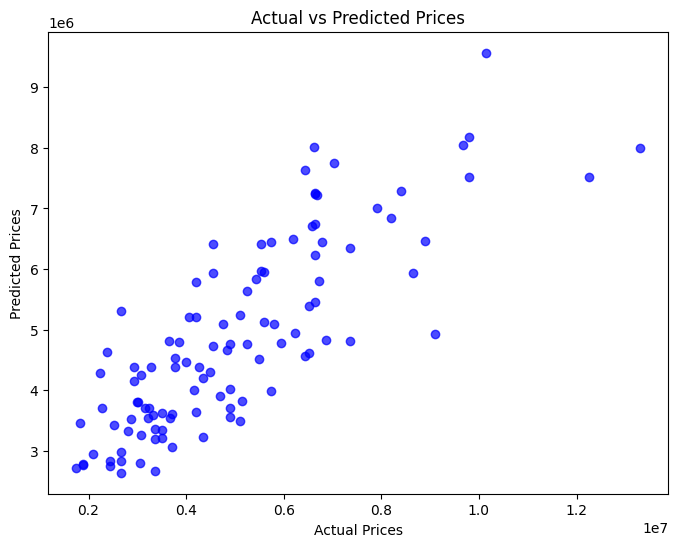

In [ ]:
# Feature-target separation
X = data.drop('price', axis=1)
y = data['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'house_price_model.pkl')
print("Model saved as 'house_price_model.pkl'.")

Model saved as 'house_price_model.pkl'.
